### This assignment may be worked individually or in pairs.
### Enter your name/names here:

In [ ]:
# Name(s) here
# Julia Joseph

In [ ]:
# headers
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
# added to make it work for google colab

uploaded = files.upload()

Saving medical-charges.txt to medical-charges.txt
Saving messidor_features.txt to messidor_features.txt
Saving sample_test.txt to sample_test.txt
Saving sample_train.txt to sample_train.txt


In [ ]:
# function to calculate adjusted r2
def get_adj_r2(r2, n, p):
    return (1-(1-r2)*((n-1)/(n-p-1)))

# Regression and KNN classifier

## Part 1: Regression with scikit-learn

In this part of the assignment, you will fit a regression model to an insurance dataset using the scikit-learn package.

The insurance company would like to be able to estimate the annual medical expenditures they will need to pay for any customer, based on the customer's age, sex, BMI, # of children, whether they are a smoker, and their region of residence.

Estimates from this model can be used to then determine how much to charge each customer for insurance (the more we think you'll cost us, the more we will charge you).

**Data Prep**

Q1. Read the dataset from 'medical-charges.txt' into a Pandas Dataframe. Display the head of the dataset. There should be 1138 rows and 7 columns. The target column (y) is the `charges` column.

In [ ]:
# your code goes here
df = pd.read_csv("medical-charges.txt", sep=",")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Q2. Notice that there are several categorical columns. You'll need to transform these to be able to do regression. Since `sex` and `smoker` are binary in this dataset, let's do them differently than `region` which has 4 options.

* Use the Pandas [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function to one-hot-encode `sex` and `smoker`.
* Since these features are binary, we do not need to create two columns for each of them (i.e. we do not need both smoker_yes and smoker_no - just having a smoker_yes column will be sufficient), so use the `drop_first` parameter of get_dummies to create only a `smoker_yes` and a `sex_male` column.
* Display the head of the dataframe.

In [ ]:
# your code goes here
sex = pd.get_dummies(df['sex'], drop_first=True)
smoker = pd.get_dummies(df['smoker'], drop_first=True)
sex.columns = ['sex_male']
smoker.columns = ['smoker_yes']
df = df.drop(['sex','smoker'], axis=1)
df = pd.concat([df,sex, smoker], axis=1)
df.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


Q3. Now one-hot encode the `region` feature by again using `get_dummies()`, but this time, even though we could drop one column, let's go ahead and explicitly keep all 4 values as columns (i.e. drop_first should be set to False). Display the head of the resulting dataframe.

In [ ]:
# your code goes here
region = pd.get_dummies(df['region'], drop_first=False)
df = df.drop(['region'], axis = 1)
df = pd.concat([df, region], axis=1)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


Q4. An interesting thing to check with regression problems is whether any of the individual features correlate very strongly with the label. Use the `corr()` method on the dataframe to take a look at this.

Answer as a comment: Do you see any features with a strong correlation to the label?

In [ ]:
# your code goes here
#region.corr()

# Whether or not they are a smoker has a high correlation with charges, and
# there is also a noticeably higher correlation with age and bmi than any other
# features.

Q5. Create a plot to show the difference in charges between the smokers and the non-smokers.

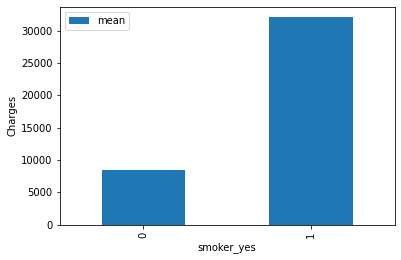

In [ ]:
colors = {0:'red', 1:'blue'}
#newdf = df.loc[0:99]
grouped_data = df.groupby('smoker_yes').describe()
#grouped_data
charges_grouped_data = grouped_data['charges']
#charges_grouped_data
charges_grouped_data = charges_grouped_data.loc[:,['mean']]
charges_grouped_data.plot(kind = 'bar', y = 'mean', ylabel = 'Charges')
# plt.scatter(df['smoker_yes'], df['charges'],
#             c = df['smoker_yes'].apply(lambda x: colors[x]),
#             marker = 'x')
# plt.title('Charge difference between Smokers and Non-Smokers', fontsize=14)
# plt.xlabel('Smoker', fontsize=14)
# plt.ylabel('Charges ($)', fontsize=14)
# plt.show()

#binning

Q6. Let's explore the relationship between `age` and `charges`. Create a scatter plot of all data points to show age vs charges.

Answer as a comment: What do you notice about the nature of this relationship?

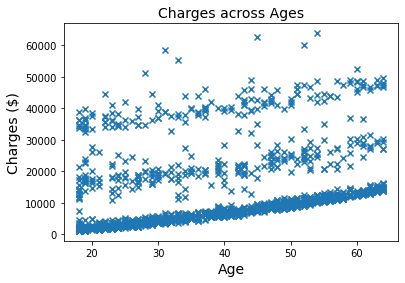

In [ ]:
plt.scatter(df['age'], df['charges'],
            marker = 'x')
plt.title('Charges across Ages', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Charges ($)', fontsize=14)
plt.show()

#Across all ages there is no major difference in charges.
#There is a slight positive correlation between age and Charges above $10,000,
#so as age increases there are slightly less individuals paying less than $10,000.

#### Simple Linear Regression
**Fit a simple linear regression model to predict `charges` from `age`.**

Q7.
* Grab the `age` column from the dataframe and call it something like `x`.
* Grab the `charges` column from the dataframe and call it something like `y`.
* When doing simple linear regression (one feature), you need to convert the features from a Series to a list of lists. You can do this by doing `x = x.values.reshape(-1,1)`, where the (-1,1) means (all rows, one column).
* Do the same to the labels (`y = y.values.reshape(-1,1)`).
* Verify that you have a list of lists for both x and y.

In [ ]:
x = df['age']
y = df['charges']
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)
x
y



array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

**Using the holdout method**

Q8. Use [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split your dataset into training and test sets. Do an 80%-20% split. Display how many records are in the training set and how many are in the test set. Set the random_state argument to your favorite number.

In [ ]:
from sklearn.model_selection import train_test_split

test_train = train_test_split(x, y,test_size=.2, train_size=.8, random_state = 33)
for i in test_train:
  print(len(i))


1070
268
1070
268


Q9.
* Create a [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) object.
* Call `fit` on it and pass in the training set.
* Print the slope and the intercept of the equation with the `.coef_` and `.intercept_` attributes.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(test_train[0],test_train[2])
print(lin_reg.intercept_)
print(lin_reg.coef_)


[3331.16109876]
[[257.90127256]]


Q10. Now that you've fit the model on the training set, you can evaluate it on the test set. Call `predict` on the linear regression object and pass in the test set. Save the return value - these are all of the predicted values under the model for the test set.

Compute some metrics to see how well this model fits the test data. Use `sklearn.metrics` to print out the MAE, MSE, RMSE, and R2 for the test set under this model. Remember that you have the actual y values for your test set, up in Q8.  

In [ ]:
import sklearn.metrics as metrics
predictions = lin_reg.predict(test_train[1])
metrics.mean_absolute_error(test_train[3], predictions)
metrics.mean_squared_error(test_train[3], predictions)
metrics.mean_squared_error(test_train[3], predictions, squared = False)
metrics.r2_score(test_train[3], predictions)



# your code goes here

0.10590837427560229

Q11. Let's see what the best fit line looks like with the test data. Scatter-plot the test data (x_test, y_test). Then line-plot the model predictions for the test data (x_test, y_test_preds).

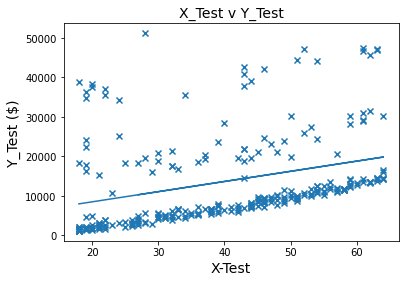

In [ ]:
plt.scatter(test_train[1],test_train[3],
            marker = 'x')
plt.title('X_Test v Y_Test', fontsize=14)
plt.xlabel('X-Test', fontsize=14)
plt.ylabel('Y_Test ($)', fontsize=14)
plt.plot(test_train[1],predictions )
plt.show()

Q12. Now, go back up to your Q8, change the random_state to a different number, and re-run Q9, Q10, Q11.

Answer as a comment: What happened and why?

In [ ]:
# Changing the random_state number only shifted the y-intercept slightly higher and increased the correlation coefficient.
# Since the random_state only affects the shuuffling, we can induce that these variables were different due to variability of the
# data points in the test and training set.

**Using cross-validation**

Q13. Use `sklearn.model_selection.cross_val_score` to perform 5-fold cross validation on a simple linear regression model.

You will pass the FULL dataset (x and y from before the train/test split in Q8) into `cross_val_score` which will automatically divide it into the number of folds you tell it to, fit a linear regression model to the training set for each fold, and test it on the test set for each fold. It will return a numpy array with the R2 on the test set for each fold. Average these R2 scores to print out the generalization estimate of the model.

On average, after 5 trials with 5 different test sets, this is how well we think a linear regression of using `age` to predict `charges` will work.

In [ ]:
from sklearn.model_selection import cross_val_score

#clf = (x,y).SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(LinearRegression(), x, y, scoring='r2',cv = 5) #added r2 scoring
total = 0
for i in scores:
  total += i
mean = total/5
print(mean)



# your code goes here

0.7191692504028051


#### Multiple Linear Regression
**Fit a multiple linear regression model to predict `charges` from `age` and `smoker`.**

Q14. Now let's see if we can get a better model by including another feature.
* From the one-hot-encoded dataframe (the result of Q3), grab both the `age` and `smoker_yes` columns. Call it something like x.
* (No need to call a reshape this time, since it is multi-dimensional data now.)
* You already have the y's.
* Create a new `sklearn.linear_model.LinearRegression` object. (Or you can re-use the one you already have.)
* Pass it all into a `sklearn.model_selection.cross_val_score` with a 5-fold CV.
* Print out the average R2.
* Once we get into **multiple** linear regression, we should not use R2, we should instead use adjusted-R2. Use the provided (at the top of the file) `get_adj_R2()` function to print out the adjusted R2. (Note, this value will be very close to the R2 because our `n` is large and our `p` is small.)

Answer as a comment: What happens when you include `smoker_yes`?

In [ ]:
x = df[['age', 'smoker_yes']]
#print(x)
new_scores = cross_val_score(LinearRegression(), x, y,scoring='r2', cv = 5)
total = 0
for n in new_scores:
  total += n
avg = (total/5)
rows = len(df.index)
get_adj_r2(avg, rows, 2)

#After adding the smoker variable, the r2 increased significantly.


0.7187485301786896

Q15. Let's go one more step and see if including ALL of our features is even better at predicting the `charges` than using just `age` and `smoker`.

* From the one-hot-encoded dataframe (the result of Q3), grab all the features, but NOT the target. Call it something like x.
* (No need to call a reshape this time, since it is multi-dimensional data now.)
* You already have the y's.
* Create a new sklearn.linear_model.LinearRegression object. (Or you can re-use the one you already have.)
* Pass it all into a sklearn.model_selection.cross_val_score with a 5-fold CV.
* Print out the average R2 and the adjusted R2.

In [ ]:
all_features = df. loc[:, df. columns !='charges']
all_scores = cross_val_score(LinearRegression(), all_features, y, scoring='r2', cv = 5)
total = 0
for n in all_scores:
  total += n
avg = (total/5)
rows = len(df.index)
print(avg)
print(get_adj_r2(avg, rows, 9))  #changed columns to 9



0.746861624347374
0.7451460781268366


Q16. Build the final model on the entire dataset.
* You should already have your x from the previous question (Q15).
* You already have the y's.
* Create a new `sklearn.linear_model.LinearRegression` object, or you can re-use the one you already have.
* Call `fit` and pass in all the data (x, y).
* Print out the coefficients and the intercept of the fitted model. The coefficients correspond to the the order in which the features are in the dataframe (x).

This defines your multiple linear regression equation!

In [ ]:
new_lin_reg = LinearRegression().fit(all_features,y)
print(new_lin_reg.coef_)
print(new_lin_reg.intercept_)



[[  256.85635254   339.19345361   475.50054515  -131.3143594
  23848.53454191   587.00923503   234.0453356   -448.01281436
   -373.04175627]]
[-12525.5478112]


## Part 2: K-Nearest Neighbors from scratch

In this part of the assignment you'll implement the K-Nearest Neighbors (KNN) classification algorithm to classify patients as either having or not having diabetic retinopathy. For this task we'll be using the same Diabetic Retinopathy data set which was used in the previous assignment on decision trees.

You may use the following function to print a confusion matrix:

In [ ]:
def print_confusion_matrix(TP, FN, FP, TN):

    table_data = [[TP,FN],[FP,TN]]
    df = pd.DataFrame(table_data, columns =['Predicted 1','Predicted 0'])
    df = df.rename(index={0: 'Actual 1', 1: 'Actual 0'})
    display(df)

In [ ]:
# you may use these constants if you want
LABEL_COLUMN = 19
BINARY_COLUMNS = {0,1,18, 19}

Q1. Normalize the data so that each feature value lies between `[0-1]`.

In class, we talked about why scaling the data is critical to KNN. We also talked about how data scaling should be done *inside the cross validataion loop*. This means that the scaling parameters should be based on the **training set only**, in order to prevent data leakage. Then the test data will need to be scaled, using the parameters found on the **training** data.

Fill in the function to take in a training dataset and a test dataset and normalize them correctly. Return the normalized datasets.

Caution: Return NEW datasets that have been normalized - do not normalize the datasets in-place, so that this can be run numerous times without altering the original data or normalizing already normalized data.

Hint: When using dataframes, you can do this without a loop!

In [ ]:
import numpy as np
def normalize_data(train, test):

    train_norm=(train-train.min())/(train.max()-train.min())
    test_norm=(test-train.min())/(train.max()-train.min())

    return train_norm, test_norm


Q2. The distance calculation method is central to the KNN algorithm. In this assignment you'll be using the Euclidean distance.

Implement a function that takes in one data point (as a list), and the training data (as a dataframe), and calculates the Euclidian distance from the single data point to each of the data points in the training data.

You may return these however you want (or may add them to the dataframe?).

Hint:
For KNN, the distance calculations are the most time-consuming part of the algorithm. Even though computing Euclidian distance seems like a simple, and therefore quick, calculation, running it thousands of times, inside of a nested 5-fold cross-validation for example, can cause this algorithm to take a very long time to run, depending on your implementation.

Remember, you almost never need to loop a Dataframe! Pandas DataFrames have been specifically optimized for fast operations on large datasets, by [vectorizing](https://www.quantifisolutions.com/vectorization-part-2-why-and-what) calculations across all rows at once.

If you use a DataFrame, you should not write a loop to calculate each of the Euclidian distances one at a time. Look at [this post](https://stackoverflow.com/questions/46908388/find-euclidean-distance-from-a-point-to-rows-in-pandas-dataframe?rq=1) for more info.

Caution: Be careful not to use the label in your distance calculation.

In [ ]:
import numpy as np

def get_distances(point, df):
    point2 = point[:LABEL_COLUMN]
    df['distance'] = (df.iloc[:,:19] - np.array(point2)).pow(2).sum(1).pow(.5)

    # your code goes here
    # print("point\n", point2)
    # print("df\n", df)
    # print(df.iloc[0]);
    return df
    # print(len(point))
    df_copy = df.copy()
    slc = list(range(df.shape[1]))
    slc.remove(LABEL_COLUMN)
    # distances = []

    # for i in range(0, df.shape[0], 1):
    #   total = 0
    #   for j in range(0, df.shape[1] - 1, 1):
    #      #(point[j], df.loc[i][j])
    #      curr_distance = point[j] - df.iloc[i][j]
    #      curr_distance_squared = curr_distance**2
    #      total += curr_distance_squared
    #   total = total**.5
    #   distances.append(total)
    # df_copy['distance'] = distances



    df_copy = df.iloc[:, slc]
    df_copy = df_copy.loc[:, df_copy. columns != 'distance']
    # print(df_copy)
    # print(point)
    # df_copy = df_copy.loc[:, df_copy.columns != '19']
    # print(df_copy)
    # print(len(df_copy.columns))
    df_copy['distance'] = (df_copy - np.array(point)).pow(2).sum(1).pow(0.5)  #changed to power of 2
    # df_copy['distance'] = np.linalg.norm(df_copy.sub(np.array(point)), axis=1)
    return df_copy

Q3. Build your KNN classifier.

This function takes in a training set (as a dataframe), a test set (as a dataframe), and a k to use, and classifies all data points in the test set, using the data in the training set and the given k.

It should return the predicted labels for the test set as a list.

Caution: Remember to normalize your data before doing distance calculations.

In [ ]:
def run_knn(train_set, test_set, k):
    train_norm, test_norm = normalize_data(train_set, test_set)
    predictions = []
    for i in range(test_norm.shape[0]):
      distances = get_distances(test_norm.iloc[i], train_norm)
      # print("Before sorting :\n", distances['distance'])
      distances = distances.sort_values(by=['distance'])
      # print("After sorting :\n", distances['distance'])
      num_zeroes = 0
      num_ones = 0
      #print(distances)
      for j in range(k):
        curr = distances.iloc[j]
        # print(curr)
        # print(curr.iloc[LABEL_COLUMN]) #changed row to column
        if(curr.iloc[LABEL_COLUMN] == 0):
          num_zeroes += 1
        else:
          num_ones += 1
      if num_zeroes > num_ones:
        predictions.append(0)
      else:
        predictions.append(1)
    # your code goes here
    return predictions

In [ ]:
def calc_accuracy(predictions, data):
  accurate = 0
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  for i in range (data.shape[0]):
    #print(dp)
    prediction = predictions[i]
    row = data.iloc[i]
    # print(prediction,row.iloc[LABEL_COLUMN])
    if prediction == row.iloc[LABEL_COLUMN]:
      accurate += 1
      if prediction == 1:
        TP+=1
      else:
        TN+=1
    else:
      if prediction == 1:
        FP+=1
      else:
        FN+=1

  calc_accuracy = float(accurate/(len(predictions)))
  return calc_accuracy, TP, TN, FP, FN

Q4. Find the best value of k for this data.

Try k ranging from 1 to 10 (odds only). For each k value, use a 5-fold cross validation to evaluate the accuracy with that k. In each fold of CV, divide your data into a training set and a validation set. Print out the best value of k and the accuracy achieved with that value. Return the best value of k. If there is a tie for best k, use the lowest of the k values.

Hint: This is the *inner* loop of a nested cross validation.

In [ ]:
def find_best_k(data):
  k_fold_start = 0
  numfolds = 5
  partition_length = int(data.shape[0]/numfolds)
  folds_array = []
  folds_array.append(data.iloc[0:partition_length])
  bestk = 0
  bestaccuracy = 0

  for k in range(1, 11, 2):
    # print("    -----------------------")
    # print("    Evaluating for k:", k)
    for j in range (1, numfolds, 1):
      folds_array.append(data.iloc[j*partition_length: (j+1)*partition_length])
    sum = 0
    for n in range (numfolds):
      train_set = []
      test_set = []
      for test in range (numfolds):
        if test == n:
          test_set = folds_array[test]
        else:
          train_set.append(folds_array[test])
      train_set = pd.concat(train_set)
      # prediction = []
      # if(k == 1):
      #   prediction = run_knn(train_set, test_set, k, True)
      # else:
      # train_norm, test_norm = normalize_data(train_set, test_set)
      prediction = run_knn(train_set, test_set, k) # change 1, uncomment above
      accuracy = calc_accuracy(prediction,test_set)[0]
      sum += accuracy
      # print ('    The accuracy on the test set is ', str(accuracy * 100.0))
      # print ('Training set size:', len(train_set))
      # print ('Test set size    :', len(test_set))
    avg_sum = sum/numfolds
    # print("    The average accuracy for this k was:", avg_sum)
    if avg_sum > bestaccuracy:
        # print("    Overtaking current best accuracy and k")
        # print("    Old best acc and k:", bestaccuracy, bestk)
        # print("    New best acc and k:", avg_sum, k)
        bestk = k
        bestaccuracy = avg_sum
  # print("    -----------------------")
  # print ('    The best avg sum on the test set is ', str(bestaccuracy * 100.0))
  # print ('    The best k on the test set is ', bestk)

  return bestk

Q5. Now measure the accuracy of your classifier using 5-fold cross validation.

In each fold of this CV, divide your data into a training set and a test set. The training set should get sent through your code for Q4, resulting in a value of k to use. Using that k, calculate an accuracy on the test set. You will average the accuracy over all 5 folds to obtain the final accuracy measurement.

Print the accuracy, the confusion matrix, and the precision and recall for class label 1 (patients that have been diagnosed with the disease).

In [ ]:
import time

def run_CV():
    # read in data
    data = pd.read_csv('messidor_features.txt', header = None)
    accuracy, TP, TN, FP, FN = 0, 0, 0, 0, 0
    TP_temp, TN_temp, FP_temp, FN_temp = 0, 0, 0, 0
    start_time = time.time()

    # your code goes here
    k_fold_start = 0
    numfolds = 5
    partition_length = int(data.shape[0]/numfolds)
    folds_array = []
    folds_array.append(data.iloc[0:partition_length])
    sum = 0
    for j in range (1, numfolds, 1):
        folds_array.append(data.iloc[j*partition_length: (j+1)*partition_length])
    # print(folds_array[0])
    for n in range (numfolds):
        train_set = []
        test_set = []
        for test in range (numfolds):
            if test == n:
                test_set = folds_array[test]
            else:
                train_set.append(folds_array[test])
            # print("appending:")
            # print(folds_array[test])
          # print(test_set)
          # print(train_set)
        print("+++++++++++++++++++++++++++++++++++++++++++++++++++")
        print("Beginning fold",(n+1),"of 5:")
        train_set = pd.concat(train_set)
        k = find_best_k(train_set)
        # train_norm, test_norm = normalize_data(train_set, test_set)
        predictions = run_knn(train_set, test_set, k) # change 2, uncomment above and change to train norm test norm
        accuracy, TP, TN, FP, FN = calc_accuracy(predictions, test_set)
        TP_temp +=TP
        TN_temp += TN
        FP_temp += FP
        FN_temp += FN

        print("Found bestk and accuracy of:", k, (accuracy*100))
        sum += accuracy
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++")
    end_time = time.time()
    print('\nTotal time (seconds):', end_time - start_time)
    avg_sum = float(sum/numfolds) * 100
    print('\nAverage accuracy:', avg_sum)
    print_confusion_matrix(TP_temp, FN_temp, FP_temp, TN_temp)
    precision = TP_temp/(TP_temp +FP_temp)
    recall = TP_temp/(TP_temp+FN_temp)
    print("precision: \n", precision)
    print("recall: \n", recall)
run_CV()

+++++++++++++++++++++++++++++++++++++++++++++++++++
Beginning fold 1 of 5:
Found bestk and accuracy of: 7 61.73913043478261
+++++++++++++++++++++++++++++++++++++++++++++++++++
Beginning fold 2 of 5:
Found bestk and accuracy of: 5 62.17391304347826
+++++++++++++++++++++++++++++++++++++++++++++++++++
Beginning fold 3 of 5:
Found bestk and accuracy of: 9 64.34782608695652
+++++++++++++++++++++++++++++++++++++++++++++++++++
Beginning fold 4 of 5:
Found bestk and accuracy of: 9 59.56521739130435
+++++++++++++++++++++++++++++++++++++++++++++++++++
Beginning fold 5 of 5:
Found bestk and accuracy of: 5 62.60869565217392
+++++++++++++++++++++++++++++++++++++++++++++++++++

Total time (seconds): 79.22004842758179

Average accuracy: 62.086956521739125


,Predicted 1,Predicted 0
Actual 1,363,248
Actual 0,188,351


precision: 
 0.6588021778584392
recall: 
 0.5941080196399345


In [ ]:
print("\nQ4. find_best_k():")

# Re-read data (to un-do normalization)
train_set = pd.read_csv("sample_train.txt", header=None)
test_set = pd.read_csv("sample_test.txt", header=None)

# find the best k on the training set
# need to add printouts in find_best_k() to see results
k = find_best_k(train_set)


Q4. find_best_k():


FileNotFoundError: ignored

In [ ]:
print("\nQ3. run_knn():")
# Re-read data (to un-do normalization)

train_set = pd.read_csv("sample_train.txt", header=None)
test_set = pd.read_csv("sample_test.txt", header=None)

# need to add printouts to run_knn() to see results
train_set, test_set = normalize_data(train_set, test_set)
# print("train set \n", train_set)
# print("test set \n", test_set)
preds = run_knn(train_set, test_set, k=3)
